In [1]:
import sys
import os
parent_dir = os.path.abspath("..")
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

In [112]:
from euterpian.chords import *
from itertools import permutations
from tqdm import tqdm
import networkx as nx
from math import exp

In [129]:
thoptitonic = ["C", "Eb", "F", "G", "B"]
all_chords = list(chords_from_scale(thoptitonic, diversity=(3, 4)))
g = nx.Graph()
g.add_nodes_from([str(c) for c in all_chords])

for chl, chr in permutations(all_chords, 2):
    notesl = set(chl.components()) 
    notesr = set(chr.components())
    diff = max(len(notesl - notesr), len(notesr - notesl))
    if diff == 1:
        g.add_edge(str(chl), str(chr), weight=diff)


{'Cm': (102.06, 219.56),
 'Csus4': (154.58, 280.94),
 'Ebaug': (94.558, 139.73),
 'Fsus2': (40.692, 269.91),
 'Gaug': (29.897, 92.376),
 'Baug': (121.51, 62.725),
 'CmM7': (158.48, 174.03),
 'G7+5': (56.751, 18.0)}

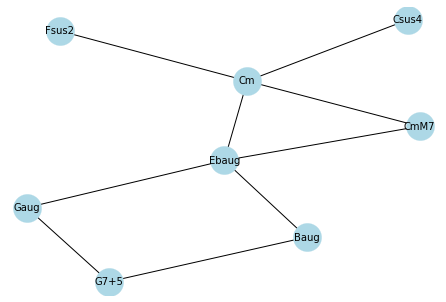

In [130]:
# pos = nx.drawing.layout.spring_layout(
#     g,
#     k=0.2,
#     iterations=3000,
#     scale=1
# ) 
pos = nx.drawing.nx_agraph.graphviz_layout(g, prog="neato")
pos = {node: (x, y) for (node, (x, y)) in pos.items()}
nx.draw(
    g, 
    pos,
    node_size=800,
    node_color="lightblue",
    linewidths=0.25,
    font_size=10,
    with_labels=True,
)
pos

In [133]:
list(note_to_chord(["C", "E", "B"]))

[]